![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [2]:
import pandas as pd
import numpy as np

# Import any additional modules and start coding below

## 1. Importing dataset and calculating the length of rental (in days)

In [3]:
rental_df = pd.read_csv("rental_info.csv")

In [4]:
rental_df.sample(5)

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
14915,2005-08-17 10:39:59+00:00,2005-08-23 08:53:59+00:00,5.99,2007.0,2.99,176.0,12.99,"{Trailers,Commentaries,""Deleted Scenes""}",0,0,0,0,35.8801,30976.0,8.9401
6282,2005-08-20 06:18:30+00:00,2005-08-27 05:33:30+00:00,6.99,2006.0,4.99,143.0,26.99,"{""Deleted Scenes""}",1,0,0,0,48.8601,20449.0,24.9001
7031,2005-07-07 12:22:07+00:00,2005-07-13 15:42:07+00:00,0.99,2010.0,0.99,110.0,24.99,"{""Deleted Scenes"",""Behind the Scenes""}",0,0,1,0,0.9801,12100.0,0.9801
2101,2005-07-30 19:15:38+00:00,2005-08-05 23:20:38+00:00,6.99,2008.0,4.99,91.0,11.99,"{""Behind the Scenes""}",0,1,0,0,48.8601,8281.0,24.9001
3615,2005-07-28 03:06:41+00:00,2005-08-01 00:08:41+00:00,4.99,2009.0,4.99,120.0,22.99,"{Trailers,Commentaries,""Behind the Scenes""}",1,0,0,0,24.9001,14400.0,24.9001


In [146]:
rental_df["rental_date"] = pd.to_datetime(rental_df["rental_date"])

In [147]:
rental_df["return_date"] = pd.to_datetime(rental_df["return_date"])

In [148]:
rental_df["rental_length"] = rental_df["return_date"] - rental_df["rental_date"]
rental_df["rental_length_days"] = rental_df["rental_length"].dt.days

In [149]:
rental_df.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length,rental_length_days
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3 days 20:46:00,3
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 20:05:00,2
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7 days 05:44:00,7
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 02:24:00,2
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4 days 01:05:00,4


## 2. Creating dummy variables from special_features column

In [150]:
rental_df.special_features.value_counts()

{Trailers,Commentaries,"Behind the Scenes"}                     1308
{Trailers}                                                      1139
{Trailers,Commentaries}                                         1129
{Trailers,"Behind the Scenes"}                                  1122
{"Behind the Scenes"}                                           1108
{Commentaries,"Deleted Scenes","Behind the Scenes"}             1101
{Commentaries}                                                  1089
{Commentaries,"Behind the Scenes"}                              1078
{Trailers,"Deleted Scenes"}                                     1047
{"Deleted Scenes","Behind the Scenes"}                          1035
{"Deleted Scenes"}                                              1023
{Commentaries,"Deleted Scenes"}                                 1011
{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}     983
{Trailers,Commentaries,"Deleted Scenes"}                         916
{Trailers,"Deleted Scenes","Behind

In [151]:
rental_df["deleted_scenes"] = np.where(
rental_df["special_features"].str.contains(
"Deleted Scenes"), 1,0
)

In [152]:
rental_df["behind_the_scenes"] = np.where(
rental_df["special_features"].str.contains(
"Behind the Scenes"), 1,0
)

In [ ]:
rental_df.head(10)

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length,rental_length_days,deleted_scenes,behind_the_scenes
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3 days 20:46:00,3,0,1
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 20:05:00,2,0,1
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7 days 05:44:00,7,0,1
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 02:24:00,2,0,1
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4 days 01:05:00,4,0,1


## 3. Removing redundancies in feature and target sets and performing train-test split

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
rental_df.columns

Index(['rental_date', 'return_date', 'amount', 'release_year', 'rental_rate',
       'length', 'replacement_cost', 'special_features', 'NC-17', 'PG',
       'PG-13', 'R', 'amount_2', 'length_2', 'rental_rate_2', 'rental_length',
       'rental_length_days', 'deleted_scenes', 'behind_the_scenes'],
      dtype='object')

In [156]:
# Choose columns to drop
cols_to_drop = ["special_features", "rental_length", "rental_length_days", "rental_date", "return_date"]

# Split into feature and target sets
X = rental_df.drop(cols_to_drop, axis=1)
y = rental_df["rental_length_days"]

In [157]:
y= rental_df["rental_length_days"]

In [158]:
y.head()
X.head()


,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,deleted_scenes,behind_the_scenes
0,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,0,1
1,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,0,1
2,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,0,1
3,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,0,1
4,2.99,2005.0,2.99,126.0,16.99,0,0,0,1,8.9401,15876.0,8.9401,0,1


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 9)

## 4. Feature Selection

In [160]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [161]:
feature_selector_model = Lasso(random_state=9, alpha = 0.3)

In [162]:
feature_selector_model.fit(X_train, y_train)

Lasso(alpha=0.3, random_state=9)

In [163]:
feature_selector_model.coef_

array([ 5.84104424e-01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  4.36220109e-02,  3.01167812e-06, -1.52983561e-01,
       -0.00000000e+00,  0.00000000e+00])

<BarContainer object of 14 artists>

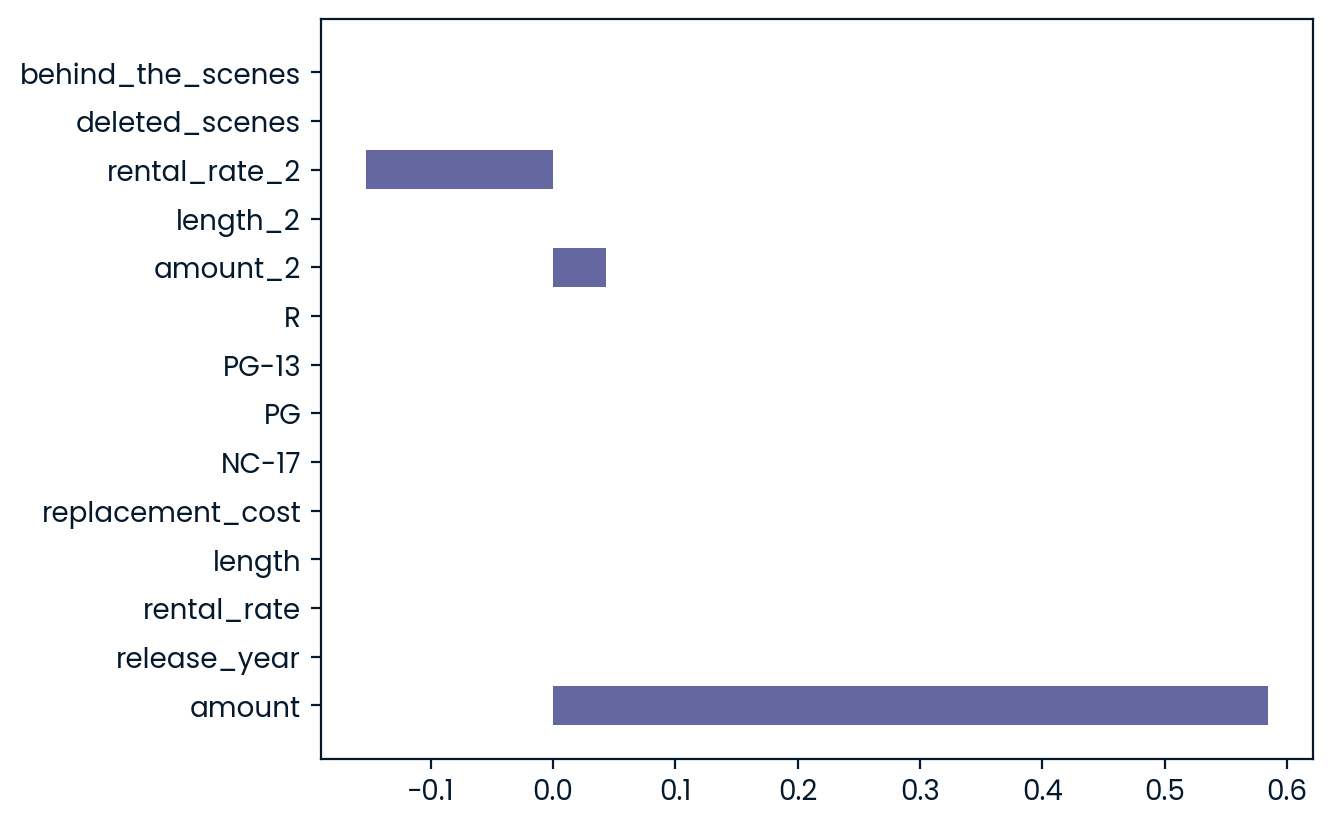

In [164]:
plt.barh(X_train.columns, feature_selector_model.coef_, label=X_train.columns)

In [165]:
plt.show()

In [166]:
useful_features_boolarray = feature_selector_model.coef_>0

In [167]:
X_train_new, X_test_new = X_train.iloc[:, useful_features_boolarray], X_test.iloc[:,useful_features_boolarray]

In [168]:
X_train_new.head()

,amount,amount_2,length_2
6682,2.99,8.9401,8100.0
8908,4.99,24.9001,2809.0
11827,6.99,48.8601,29241.0
6153,2.99,8.9401,5329.0
10713,5.99,35.8801,14884.0


## 5. Running and evaluating different regression models

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [170]:
ols = LinearRegression()
ols = ols.fit(X_train_new, y_train)
y_test_pred = ols.predict(X_test_new)
mse_ols = mean_squared_error(y_test, y_test_pred)
print(mse_ols)

4.812297241276244


In [171]:
dt = DecisionTreeRegressor()
dt.fit(X_train_new, y_train)
y_test_pred = dt.predict(X_test_new)
mse_dt = mean_squared_error(y_test, y_test_pred)
print(mse_dt)

3.645633359745855


In [172]:
rf = RandomForestRegressor()
rf_params = {
    "n_estimators": np.arange(1,101,1),
    "max_depth": np.arange(1,11,1)
}

In [173]:
random_search = RandomizedSearchCV(estimator=rf, n_jobs=-1, param_distributions=rf_params, cv =5, random_state=9)

In [174]:
random_search.fit(X_train_new, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
                   random_state=9)

In [175]:
random_search.best_params_

{'n_estimators': 51, 'max_depth': 10}

In [176]:
best_rf = random_search.best_estimator_

In [177]:
best_rf.fit(X_train, y_train)
y_test_pred = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_test_pred)

In [178]:
mse_rf

2.220369899149945

## 6. Conclusion

In [179]:
best_model = rf
best_mse = mse_rf

In [5]:
print("the best model and best mse have been found -sunil")

the best model and best mse have been found -sunil
